<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion15/15_Aprendizaje_no_supervisado-agrupaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion15/15_Agrupacion.pdf)**
# Clase 15
#  Aprendizaje no supervisado
## Agrupación K-medias, jerárquica y DBSCAN

Seguimos con la base de datos de consumidores.

In [18]:
!pip install plotly

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

## Datos
Tenemos una base de datos: la unidad de observación son consumidores de un centro comercial.

In [20]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

### Visualicemos esos consumidores

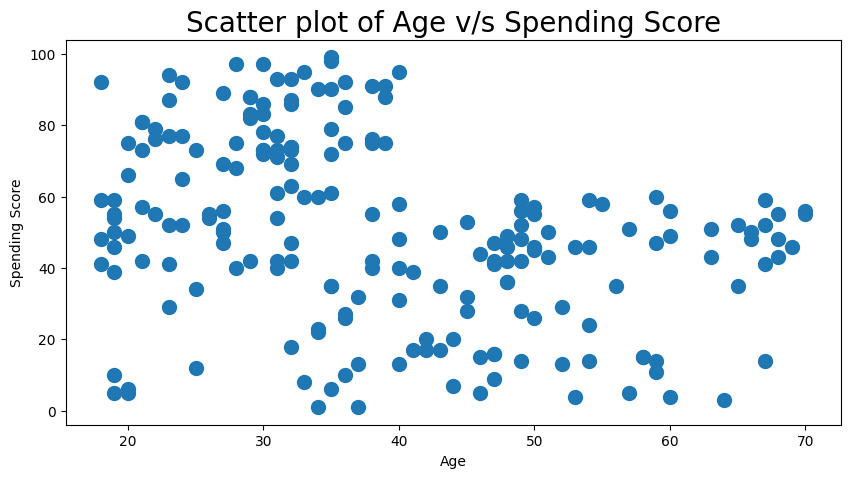

In [23]:
plt.figure(1 , figsize = (10 , 5))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

## Modelos
Vamos a crear los siguientes modelos de agrupación y los vamos a comparar:
* K-medias
* Agrupación jerárquica
* Agrupación por densidad DBSCAN

### K-means
En K-medias, los centros se mueven hacia los datos cercanos, y luego los datos cercanos escogen su centro más cercano, hasta que hay estabilidad.

In [29]:
X1 = df[['Age' , 'Spending Score (1-100)','Annual Income (k$)']].iloc[: , :].values
X1[0:5]

array([[19, 39, 15],
       [21, 81, 15],
       [20,  6, 16],
       [23, 77, 16],
       [31, 40, 17]])

### Análisis del codo

In [30]:
X1 = df[['Age' , 'Spending Score (1-100)','Annual Income (k$)']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

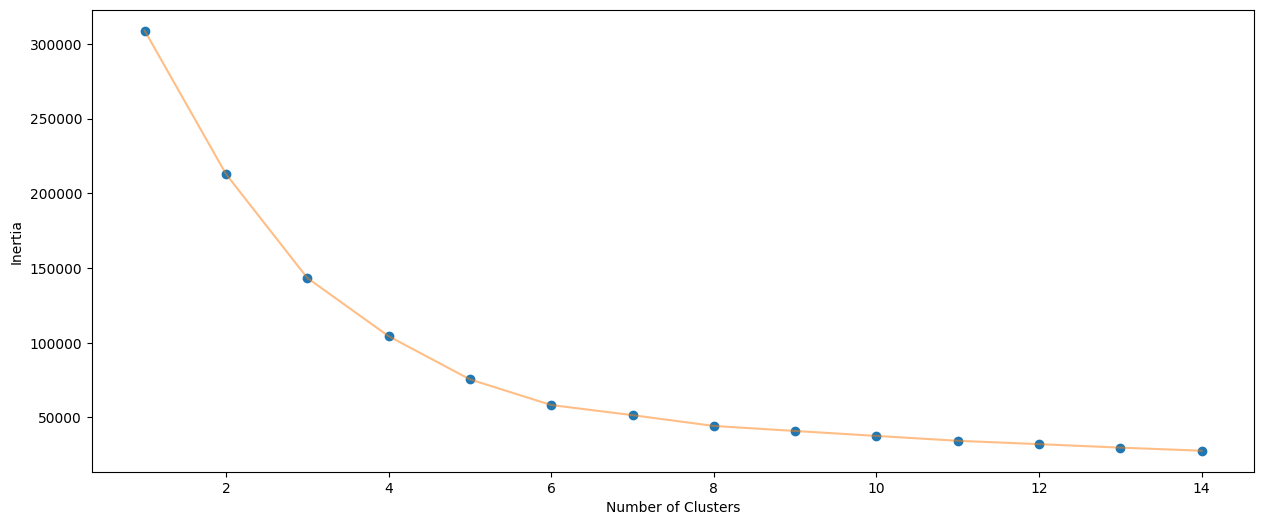

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Observamos que** parece que la incercia se estabiliza al rededor de cuatro grupos. Este puede ser un punto de partida, **pero no camisa de fuerza**, el criterio del analista es clave.

In [32]:
## Después de haber hecho el análisis del codo, nos quedábamos con 4 grupos:

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [33]:
labels1

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [35]:
df['Grupo'] = labels1

In [39]:
df[df['Grupo']==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupo
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2
11,12,Female,35,19,99,2
13,14,Female,24,20,77,2
15,16,Male,22,20,79,2
17,18,Male,20,21,66,2
19,20,Female,35,23,98,2


In [34]:
centroids1

array([[43.72727273, 49.32467532, 55.48051948],
       [32.69230769, 82.12820513, 86.53846154],
       [24.96      , 77.        , 28.04      ],
       [45.2173913 , 20.91304348, 26.30434783],
       [40.66666667, 17.58333333, 87.75      ]])

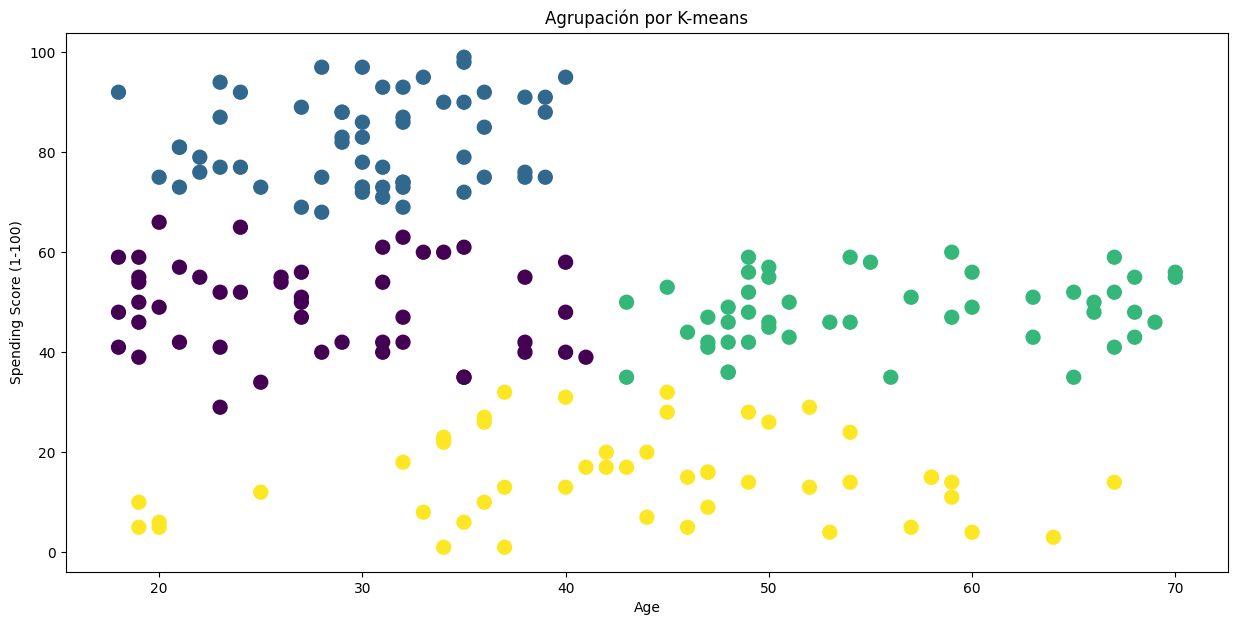

In [11]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
#plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.title('Agrupación por K-means')
plt.show()

### Jerárquica
[Referencia](https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/master/_notebooks/2020-06-06-02-Hierarchical-Clustering.ipynb#scrollTo=CdHHHWloEbov)

In [40]:
# Formato correcto de los datos
X = df[['Age' , 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


<Axes: title={'center': 'Agrupación Jerárquica'}, xlabel='Age', ylabel='Spending Score (1-100)'>

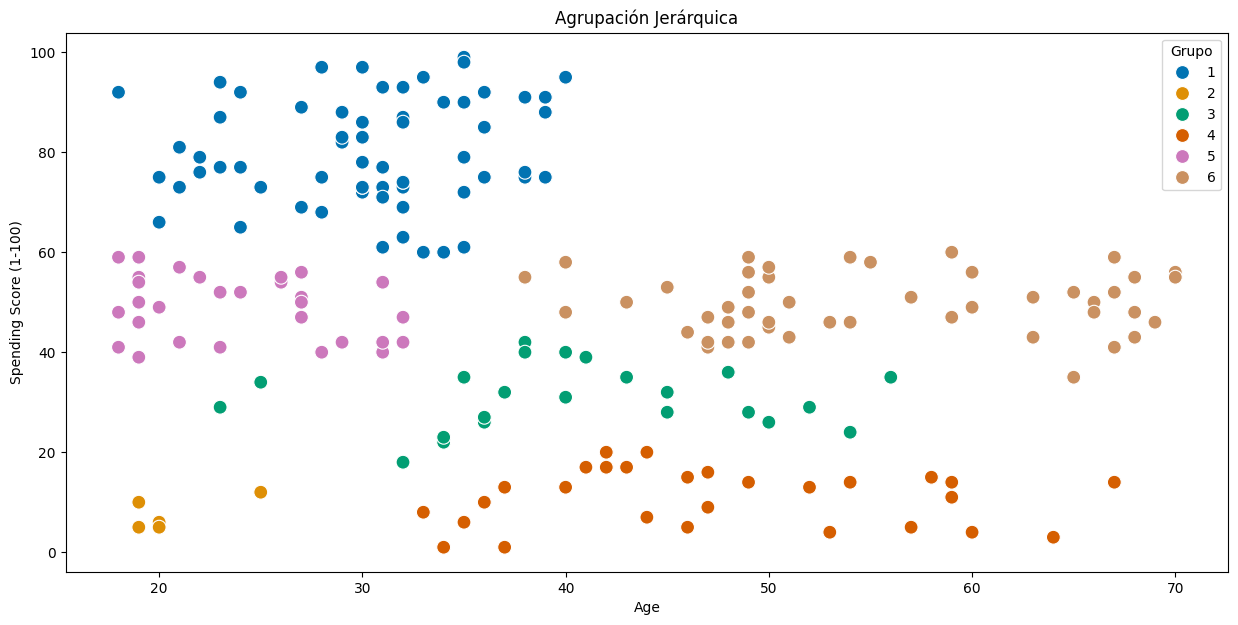

In [48]:
# Use the linkage()
distance_matrix = linkage(X, method='centroid', metric='euclidean')

# Assign cluster labels
numero_grupos = 5
# maxclust: En cuentra la distancia óptima entre dos observaciones para la creación de grupos
X['Grupo'] = fcluster(distance_matrix, t=20, criterion='distance')

# Plot clusters
plt.figure(2 , figsize = (15 , 7) )
plt.title('Agrupación Jerárquica')
sns.scatterplot(x='Age', y='Spending Score (1-100)', s=100, hue='Grupo', data=X, palette='colorblind')

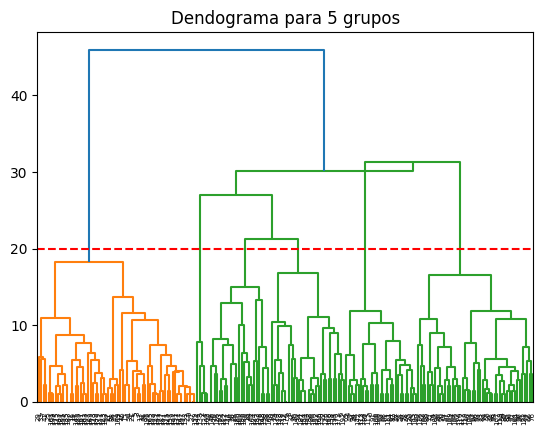

In [46]:
plt.title('Dendograma para 5 grupos')
dendograma=dendrogram(distance_matrix)
plt.axhline(y=20, color='r', linestyle='--')

In [50]:
X.groupby('Grupo').mean()

,Age,Spending Score (1-100)
Grupo,,
1,30.140625,80.156250
2,20.600000,7.600000
3,40.560000,31.280000
4,47.700000,11.233333
5,24.000000,48.931034
6,55.255319,49.659574


In [51]:
X[X['Grupo']==1]

,Age,Spending Score (1-100),Grupo
1,21,81,1
3,23,77,1
5,22,76,1
7,23,94,1
9,30,72,1
...,...,...,...
191,32,69,1
193,38,91,1
195,35,79,1
197,32,74,1


### DBSCAN

In [15]:
# Usamos este formato
X1[0:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

In [56]:
# eps: distancia máxima
# min_samples: número de datos para ser popular
modeloDensidad = DBSCAN(eps=7, min_samples=3).fit(X)
etiquetas = modeloDensidad.labels_
modeloDensidad

DBSCAN(eps=7, min_samples=3)

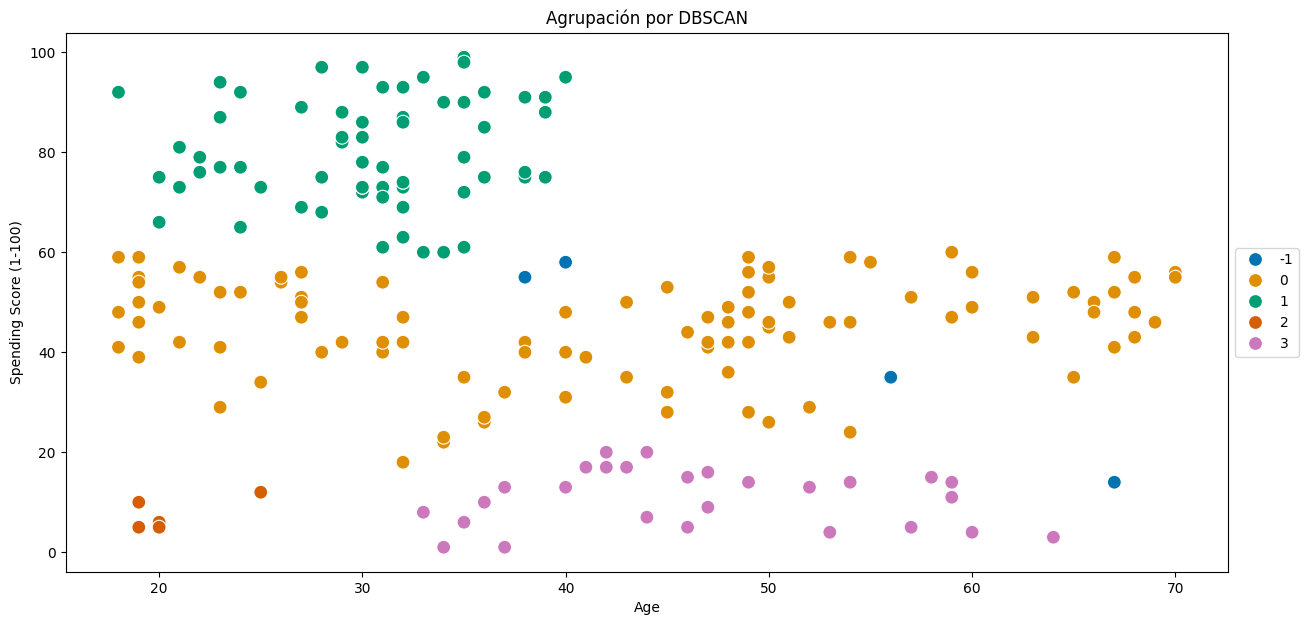

In [57]:
plt.figure(3 , figsize = (15 , 7) )
plt.title('Agrupación por DBSCAN')
c= sns.scatterplot(x='Age', y='Spending Score (1-100)', s=100, hue=etiquetas, data=X, palette='colorblind')
c.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [59]:
X['GRupo_DBSCAN']=etiquetas

In [61]:
X.groupby('GRupo_DBSCAN').mean()

,Age,Spending Score (1-100),Grupo
GRupo_DBSCAN,,,
-1,50.250000,40.500000,4.750000
0,42.581633,44.765306,4.969388
1,30.140625,80.156250,1.000000
2,20.600000,7.600000,2.000000
3,47.034483,11.137931,4.000000


In [62]:
X[X['GRupo_DBSCAN']==1]

,Age,Spending Score (1-100),Grupo,GRupo_DBSCAN
1,21,81,1,1
3,23,77,1,1
5,22,76,1,1
7,23,94,1,1
9,30,72,1,1
...,...,...,...,...
191,32,69,1,1
193,38,91,1,1
195,35,79,1,1
197,32,74,1,1
